# Programming for Data Science and Artificial Intelligence

## K-Means Clustering

### Readings:
- [VANDER] Ch5
- [HASTIE] Ch14.3
- https://scikit-learn.org/stable/modules/clustering.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## K-Means Clustering

In the clustering problem, we are given a training set $\{x^{(1)},\cdots,x^{(m)}\}$, and want to group the data into a few cohesive "clusters".  Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.  Here, $x^{(i)} \in \mathbb{R}^n$ as usual, but **no labels $y^{(i)}$ are given**.  Thus, this is an unsupervised learning problem.  

The *k*-means clustering algorithm is as follows:

1. Define $k$
2. Initialize cluster centroids $\mu_1, \mu_2, \cdots, \mu_k \in \mathbb{R}^n$ randomly
3. Repeat until convergence: {
            
    For every $i \in m$ , set
            
   $$c^{(i)} :=\mathop{\arg\min}_{j} ||x^{(i)} - \mu_j||^2 $$
   
   where the right part is simply the Euclidean distance equation
   
   $$d(x^{(i)}, x^{(i')}) = \sum\limits_{j=1}^n (x^{ij} - x^{i'j})^2 = ||x^{(i)} - x^{(i')}||^2$$
   
   For each $j = 1, 2, \cdots, k$, set
   
   $$\mu_j := \frac{\sum\limits_{i=1}^m I\{c^{(i)} = j\}x^{(i)}}{\sum\limits_{i=1}^m I\{c^{(i)} = j\}}$$
   
   }

In the algorithm above, $k$ is the number of clusters we want to find; and the cluster centroids $\mu_j$ represent our current guesses for the positions of the centers of the clusters. To initialize the cluster centroids, we could choose $k$ training examples randomly, and set the cluster centroids to be equal to the values of these $k$ examples. (Note that other initialization methods are also possible).

The inner loop of the algorithm repeatedly carries out two steps: 

1. "Assigning" each training example $x^{(i)}$ to the closest cluster centroid $\mu_j$, where *closest* is defined using Euclidean distance.

2. Moving each cluster centroid $\mu_j$ to the mean of the points assigned to it.  The $k$th cluster centroid is the vector of the $n$ feature means for the observations in the $k$th cluster 

**Choosing k**

To choose $k$, we define "good" clusters as having minimum **within-cluster variation**  $W(c_k)$, using the following formula:

$$W(c_k) = \sum\limits_{i \in c_k}^m \sum\limits_{j=1}^{n} (x^{ij} - \bar{x}^{kj})^2$$

Here $\bar{x}^{(k)}$ refers to the mean belong to class $k$.  In other words, the within-cluster variation for the $k$th cluster is the sum of squared Euclidean distances between the observations and mean across all features in the $k$th cluster.  Using this equation, we can come up with **total within-cluster variation** or sometimes we call **total sum of squares**

$$W(C) = \sum\limits_{k=1}^{K}\sum\limits_{i \in c_k}^m \sum\limits_{j=1}^{n} (x^{ij} - \bar{x}^{kj})^2$$

We can say that best k should minimize the following objective function:

$$\mathop{\min}_{k} W(C) $$

**Relation to a bigger family of algorithm - Expectation-Maximization**

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.  The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.  Each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

We can visualize the algorithm as shown in the following figure.
![](../../Figures/em.png)

### Implementation

Done in 14 iterations
Fit and predict time: 0.0771169662475586


Text(0.5, 1.0, 'Final result')

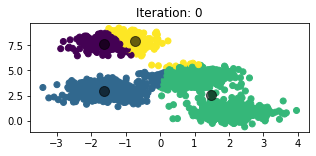

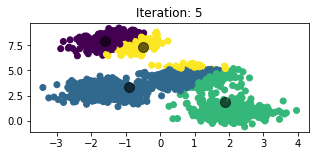

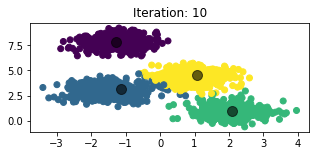

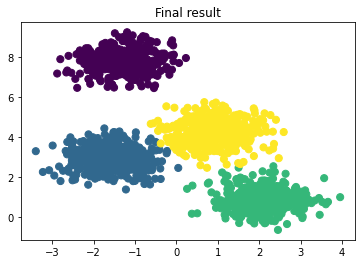

In [2]:
#Implement K-means from scratch
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time

X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)

def kmeans(X, n_clusters):
    m, n = X.shape

    #1. randomly choose n clusters from X
    #you can also randomly generate any two points
    rng = np.random.RandomState(42)
    i = rng.permutation(m)[:n_clusters]
    centers = X[i]

    iteration = 0

    while True:
        #2. assign lables based on closest center
        #return the index of centers having smallest
        #distance with X
        labels = pairwise_distances_argmin(X, centers)

        #3. find new centers
        new_centers = []
        for i in range(n_clusters):
            new_centers.append(X[labels == i].mean(axis=0))

        #convert list to np.array; you can actually combine #3
        #with np.array in one sentence 
        new_centers = np.array(new_centers)
        
        #plotting purpose
        #plot every 5th iteration to save space
        #remove this if, if you want to see each snapshot
        if (iteration % 5 == 0):
            pred = pairwise_distances_argmin(X, new_centers)
            plt.figure(figsize=(5, 2))
            plt.title(f"Iteration: {iteration}")
            plt.scatter(X[:, 0], X[:, 1], c=pred)
            plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)

        #4 stopping criteria - if centers do not 
        #change anymore, we stop!
        if(np.allclose(centers, new_centers)):
            break
        else:
            centers = new_centers
            iteration+=1
    
    print(f"Done in {iteration} iterations")
    return centers
        
def predict(X, centers):
    return pairwise_distances_argmin(X, centers)

start = time()
preds = predict(X, kmeans(X, n_clusters=4))
print(f"Fit and predict time: {time() - start}")
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)
plt.title("Final result")

### Sklearn

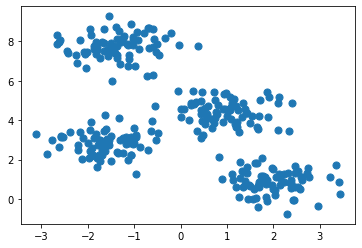

In [3]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

K-mean is an unsupervised algorithm that aims to cluster the data based on distances.

In [4]:
from sklearn.cluster import KMeans

#How did I know there are n_clusters = 4 (because I cheat!  But what if I don't know in advance?)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[0 1 2 1 0 0 3 2 1 1 3 1 2 1 0 2 2 0 3 3 0 0 2 3 3 2 0 2 3 2 1 1 2 1 1 1 1
 1 3 0 2 3 2 2 3 3 1 3 1 0 3 0 1 0 0 3 1 3 1 0 1 2 1 3 3 3 1 0 1 3 2 3 1 3
 3 1 3 2 0 1 0 2 0 0 1 2 0 2 1 1 2 0 1 3 3 2 0 0 2 3 1 0 1 0 2 0 0 2 1 2 3
 3 0 1 0 2 1 0 0 2 3 0 3 0 0 0 0 3 0 3 1 3 3 0 1 3 3 1 2 1 1 3 2 3 2 3 1 2
 1 1 1 2 1 2 0 3 1 3 0 2 1 2 2 0 2 3 3 2 0 2 2 1 0 2 3 1 0 0 2 3 0 2 3 3 2
 2 2 2 0 1 2 3 2 2 3 3 3 2 3 1 2 3 0 3 2 1 3 1 2 1 2 3 2 2 1 3 3 0 0 2 1 0
 0 3 0 3 2 1 1 2 2 1 2 0 3 2 0 3 1 3 0 2 0 1 1 1 1 3 3 1 2 3 0 2 3 3 3 0 0
 1 2 2 3 0 1 3 2 1 2 0 0 3 3 2 0 0 0 2 1 1 0 0 2 0 0 0 1 3 1 2 0 0 1 1 1 0
 0 2 1 3]


Let's visualize.

Centers:  [[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]]


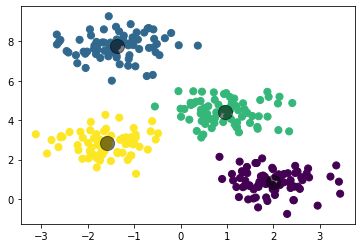

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
print("Centers: ", centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#### How to know how many clusters?

'\n4 Clusters could be good. Why not 19 then?  Because 4 got a good balance between within-sum of squared distances,\nand the number of clusters.  Having way too many clusters with little gain of the within-sum will increase\ncomputation time.\n'

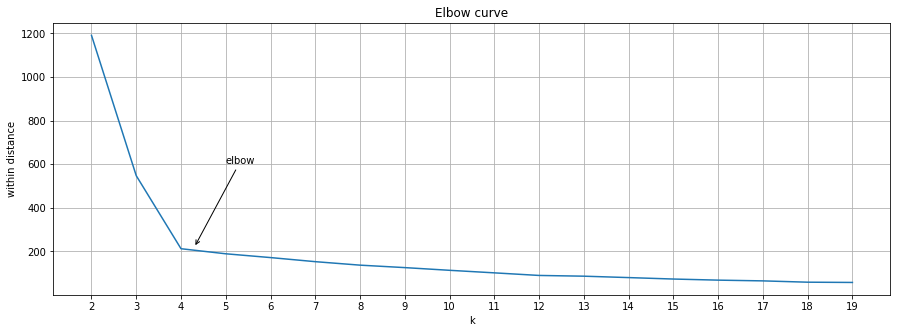

In [6]:
#sum of squared distances
ssd = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), ssd)
plt.xticks(range(2, 20))
plt.grid(True)
plt.ylabel("within distance")
plt.xlabel("k")
plt.title('Elbow curve')

plt.annotate('elbow', xy=(4.3, 220), xytext=(5, 600),  #xytext ---> xy
            arrowprops=dict(arrowstyle="->"))

'''
4 Clusters could be good. Why not 19 then?  Because 4 got a good balance between within-sum of squared distances,
and the number of clusters.  Having way too many clusters with little gain of the within-sum will increase
computation time.
'''


#### K-means assumes equal-sized spherical distribution

In [7]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

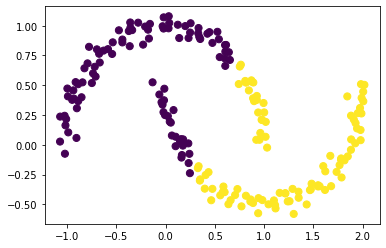

In [8]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### K-means does not work well with uneven size clusters

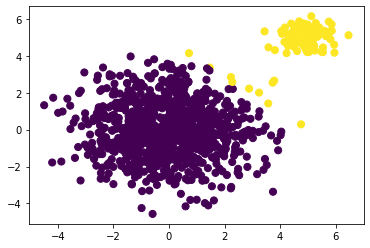

In [9]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [5.0, 5.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

### When to use K-means

1.  May not guarantee optimal solution.  Depends on initialization.  Can be fix by running k-means many times with different init random values.

2. Require knowing how many clusters beforehand.  Simple way is to use the elbow method which compute within clusters distances.  In sklearn, this can be easily computed using <code>kmeans inertia_ variable</code>.

3. Assume spherical distribution.  This also means that all k-means assume that clusters have equal number of samples (which may not be true!)

4. Similar to K-nearest neighbors and MDS, k-means can be ridiciously slow for large number of samples.  One way to fix this is using the concept of Mini-Batch.  It is implemented in <code>sklearn.cluster.MiniBatchMeans</code>.